In [97]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
# import torch


In [114]:
analysis_file = 'analysis.json'
# analysis_file = 'analysis_4.json'
# analysis_file = 'analysis_1_bi.jsonl'
analysis_file = 'analysis_4_bi.jsonl'
analysis_file = 'analysis_1_wiki.jsonl'
# analysis_file = 'analysis_4_wiki.jsonl'

data = []
with open(analysis_file, 'r', encoding='utf8') as inf:
    for line in inf:
        data.append(json.loads(line.strip()))
        
print(len(data))

27


In [115]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

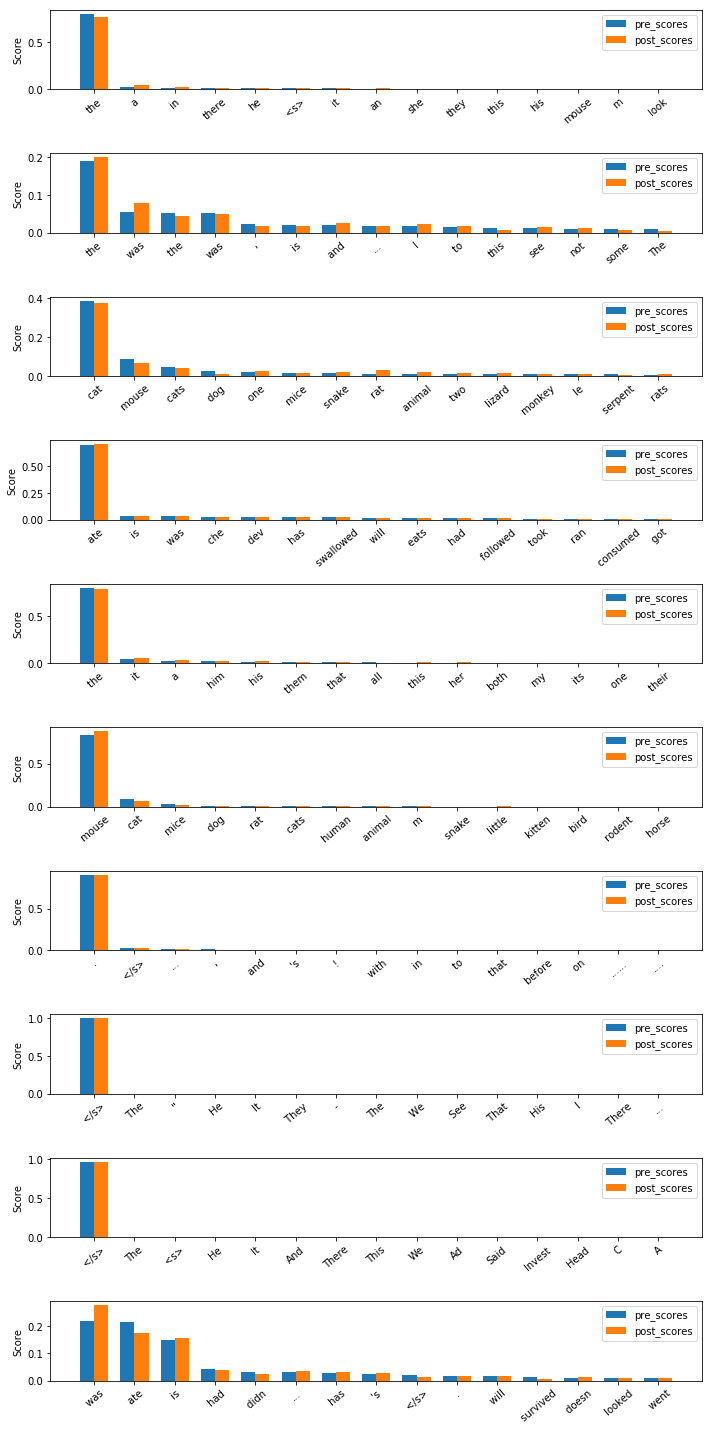

In [120]:
timesteps = 10
top_k = 15
fig, axes = plt.subplots(nrows=timesteps, ncols=1, figsize=(10, 20), sharex=False)

hyp = 4
x = np.arange(top_k)  # the label locations
width = 0.35  # the width of the bars

for i in range(len(data))[:timesteps]:
#     print(data[i]['time_step'])
    tokens = data[i]['top_tokens'][hyp][:top_k]
    pre_scores = softmax(np.array(data[i]['pre_scores'][hyp]))[:top_k]
    post_scores = softmax(np.array(data[i]['post_scores'][hyp]))[:top_k]
#     pre_scores = np.array(data[i]['pre_scores'][hyp][:top_k])
#     post_scores = np.array(data[i]['post_scores'][hyp][:top_k])
#     print(pre_scores)
    axes[i].bar(x-width/2, pre_scores, width, label='pre_scores', align='center')
    axes[i].bar(x+width/2, post_scores, width, label='post_scores', align='center')
    
#     print(tokens)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axes[i].set_ylabel('Score')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(tokens, rotation=40)
    axes[i].legend()

# plt.xticks(rotation=40)
#     axes[i].bar_label(rects1, padding=3)
#     axes[i].bar_label(rects2, padding=3)
plt.tight_layout()